In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from sklearn import svm

In [47]:
X= np.arange(0,20,.1)
Y = np.sin(X) + np.random.normal(0,.5,len(X)) 

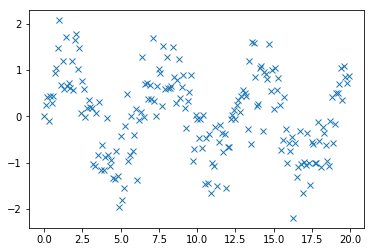

In [48]:
plt.plot(X,Y,'x')

In [49]:
X.shape= (len(X),1)

In [74]:
clf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
#clf = svm.SVR(kernel='rbf')#, C=1e3, gamma=0.1)
#clf = svm.SVR()
clf.fit(X, Y) 

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

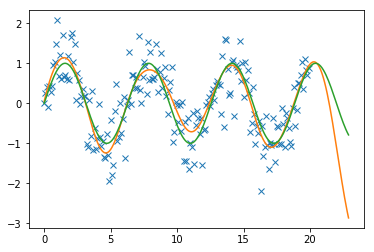

In [76]:
X2= np.arange(0,23,.1)
X2.shape= (len(X2),1)
Y2= clf.predict(X2)
Y3 = np.sin(X2)

plt.plot(X,Y,'x')
plt.plot(X2,Y2)
plt.plot(X2,Y3)



In [3]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)  

svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
clf.predict([[2., 2.]])

array([1])

In [7]:
# get support vectors
clf.support_vectors_


array([[ 0.,  0.],
       [ 1.,  1.]])

In [8]:

# get indices of support vectors
clf.support_ 



array([0, 1], dtype=int32)

In [9]:
# get number of support vectors for each class
clf.n_support_ 

array([1, 1], dtype=int32)

In [10]:

import numpy as np
X = np.array([[-1, -1], 
              [-2, -1], 
              [1, 1], 
              [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC


In [11]:
clf = SVC()

In [12]:
clf.fit(X, y) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
print(clf.predict([[-0.8, -1]]))

[1]


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

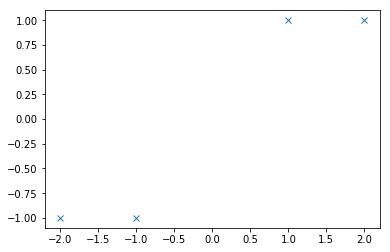

In [21]:
plt.plot(X[:,0],X[:,1],'x');

/Users/MichelMacSDD/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


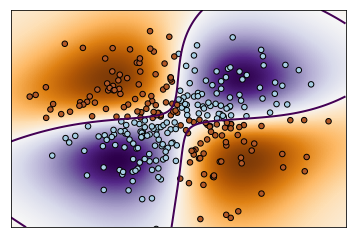

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC()
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

In [ ]:
2+2

In [ ]:
# Author: Emmanuelle Gouillart <emmanuelle.gouillart@nsup.org>
# License: BSD 3 clause

import numpy as np
from scipy import sparse
from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


def _weights(x, dx=1, orig=0):
 x = np.ravel(x)
 floor_x = np.floor((x - orig) / dx)
 alpha = (x - orig - floor_x * dx) / dx
 return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))


def _generate_center_coordinates(l_x):
 l_x = float(l_x)
 X, Y = np.mgrid[:l_x, :l_x]
 center = l_x / 2.
 X += 0.5 - center
 Y += 0.5 - center
 return X, Y


def build_projection_operator(l_x, n_dir):
 """ Compute the tomography design matrix.

 Parameters
 ----------

 l_x : int
 linear size of image array

 n_dir : int
 number of angles at which projections are acquired.

 Returns
 -------
 p : sparse matrix of shape (n_dir l_x, l_x**2)
 """
 X, Y = _generate_center_coordinates(l_x)
 angles = np.linspace(0, np.pi, n_dir, endpoint=False)
 data_inds, weights, camera_inds = [], [], []
 data_unravel_indices = np.arange(l_x ** 2)
 data_unravel_indices = np.hstack((data_unravel_indices,
 data_unravel_indices))
 for i, angle in enumerate(angles):
 Xrot = np.cos(angle) * X - np.sin(angle) * Y
 inds, w = _weights(Xrot, dx=1, orig=X.min())
 mask = np.logical_and(inds >= 0, inds < l_x)
 weights += list(w[mask])
 camera_inds += list(inds[mask] + i * l_x)
 data_inds += list(data_unravel_indices[mask])
 proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
 return proj_operator


def generate_synthetic_data():
 """ Synthetic binary data """
 rs = np.random.RandomState(0)
 n_pts = 36.
 x, y = np.ogrid[0:l, 0:l]
 mask_outer = (x - l / 2) ** 2 + (y - l / 2) ** 2 < (l / 2) ** 2
 mask = np.zeros((l, l))
 points = l * rs.rand(2, n_pts)
 mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
 mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
 res = np.logical_and(mask > mask.mean(), mask_outer)
 return res - ndimage.binary_erosion(res)


# Generate synthetic images, and projections
l = 128
proj_operator = build_projection_operator(l, l / 7.)
data = generate_synthetic_data()
proj = proj_operator * data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)

# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

plt.figure(figsize=(8, 3.3))
plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('offpplt.title('originalge')
plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L2alization')
plt.axis('offlt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L1alization')
plt.axis('offplt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
 right=1)

plt.show()


In [2]:
2+2

4

In [4]:

import numpy as np

In [6]:

# Ejemplo factorización QR
A = np.array([[0,1,0],
              [0,0,1],
              [13,-9,-3]])  

Q, R = np.linalg.qr(A)

In [8]:
Q

array([[ 0., -1.,  0.],
       [-0.,  0.,  1.],
       [-1.,  0.,  0.]])

In [9]:
R

array([[-13.,   9.,   3.],
       [  0.,  -1.,   0.],
       [  0.,   0.,   1.]])

In [13]:
Q@R

array([[  0.,   1.,   0.],
       [  0.,   0.,   1.],
       [ 13.,  -9.,  -3.]])

In [14]:
A = np.array([[0,1,0],
              [0,0,1],
              [13,-9,-3]])  

Q, R = np.linalg.qr(A)

In [16]:
Q@R

array([[  0.,   1.,   0.],
       [  0.,   0.,   1.],
       [ 13.,  -9.,  -3.]])

In [ ]:
R@Q

In [18]:
Q@Q.T

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])